## EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Se cargan los tres Datasets para inicial el análisis



In [2]:
games = pd.read_parquet('../ETL/ETL_games_clean')
reviews = pd.read_parquet('../ETL/ETL_user_reviews_clean')
items = pd.read_parquet('../ETL/ETL_items_clean')

## Juegos y generos mas judados por los usuarios

In [4]:
reviews.columns

Index(['user_id', 'item_id', 'reviews_helpful', 'reviews_recommend',
       'reviews_date', 'sentiment_analysis'],
      dtype='object')

In [5]:
reviews

,user_id,item_id,reviews_helpful,reviews_recommend,reviews_date,sentiment_analysis
0,76561197970982479,1250,No ratings yet,True,2011-11-05,2
1,js41637,251610,15 of 20 people (75%) found this review helpful,True,2014-06-24,2
2,doctr,250320,2 of 2 people (100%) found this review helpful,True,2013-10-14,2
3,maplemage,211420,35 of 43 people (81%) found this review helpful,True,2014-04-15,1
4,Wackky,249130,7 of 8 people (88%) found this review helpful,True,2014-05-05,0
...,...,...,...,...,...,...
48904,76561198138691719,332310,No ratings yet,True,2015-12-30,0
48905,SKELETRONPRIMEISOP,440,No ratings yet,True,2014-08-15,2
48906,76561198141079508,304930,No ratings yet,True,2014-08-02,0
48907,ShadowYT100,265630,No ratings yet,True,2015-07-31,2


In [6]:
items.columns

Index(['item_id', 'playtime_forever', 'playtime_2weeks', 'user_id',
       'items_count', 'steam_id'],
      dtype='object')

## EDA de el dataframe games

In [3]:
games.head()

,genres,title,release_date,price,item_id,developer
0,Action,Orbitality,2017,9.99,753100.0,Wonderbox Games
1,Indie,Castle In The Darkness,2015,9.99,262960.0,"Matt Kap,Nicalis, Inc."
2,Simulation,Galactic Civilizations III - Mech Parts Kit DLC,2017,2.99,513520.0,Stardock Entertainment
3,Simulation,Project CARS - Classic Lotus Track Expansion,2015,7.49,334782.0,Slightly Mad Studios
4,Early Access,The Crowded Party Game Collection,2017,7.99,618640.0,crowgames UG (haftungsbeschränkt)


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import

Realizamos un top5 de los juegos mas jugados segun acumulación de las horas y los géneros

In [8]:
#top 5 de los juegos mas jugados por horas
#tomo las columnas que necesito
title = games['title']
tiempo = items['playtime_forever']

# Concatena las dos series en un nuevo DataFrame
df_juego = pd.concat([title, tiempo], axis=1)

#se sacan las horas
top5= df_juego[['title','playtime_forever']].groupby('title').sum()

#Se saca el top5
juego_mas_jugado = top5['playtime_forever'].sort_values(ascending=False).head(5)


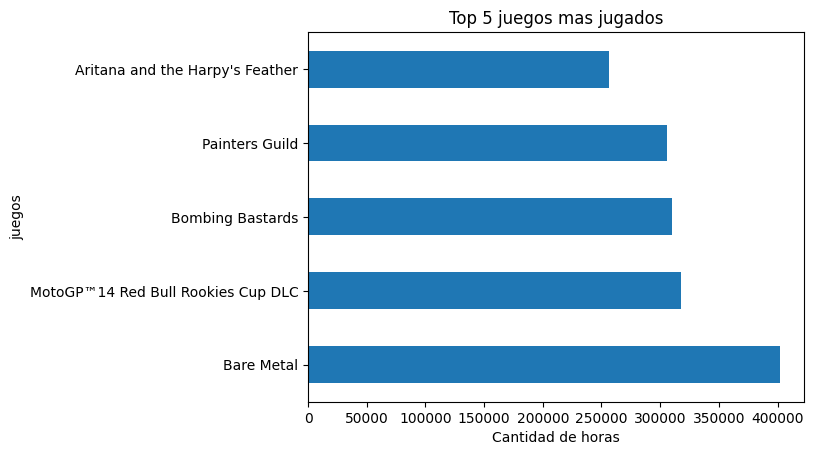

In [9]:
#Graficamos
juego_mas_jugado.plot(kind='barh')
plt.title('Top 5 juegos mas jugados')
plt.xlabel('Cantidad de horas')
plt.ylabel('juegos')
plt.xticks(rotation=0)
plt.show()

In [10]:
#top5 de los generos mas jugados
#tomo las columnas que necesito
genero = games['genres']
tiempo = items['playtime_forever']

# Concatena las dos series en un nuevo DataFrame
df_genero = pd.concat([genero, tiempo], axis=1)

#se sacan las horas
top5= df_genero[['genres','playtime_forever']].groupby('genres').sum()

#Se saca el top5
genero_mas_jugado = top5['playtime_forever'].sort_values(ascending=False).head(5)


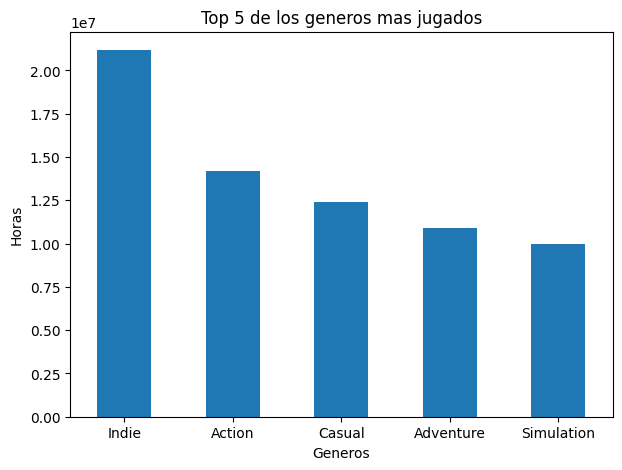

In [11]:
#Grafico
plt.figure(figsize=(7,5))
genero_mas_jugado.plot(kind='bar')
plt.title('Top 5 de los generos mas jugados')
plt.xlabel('Generos')
plt.ylabel('Horas')
plt.xticks(rotation=0)
plt.show()

El juego al que más horas se le ha dedicado es al juego llamado 'Bare Metal' y el género preferido es el Indie, seguido por Action.

A continuación veremos el top 10 de los Developers con mayor cantidad de juegos,analizaremos la cantidad de 'sentiment_analysis'  observando su calificación categorica y analizaremos la distribución de precios 

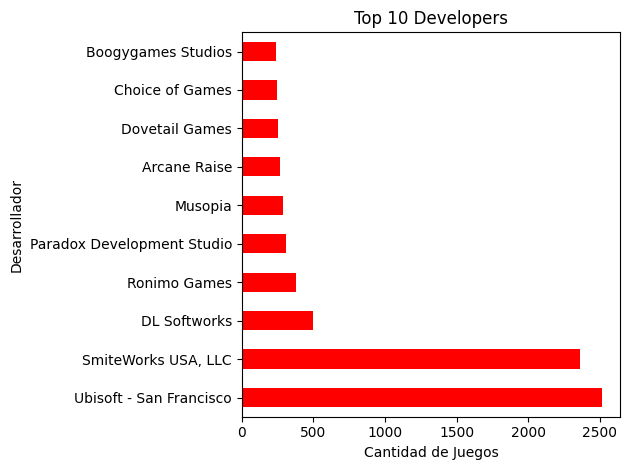

In [12]:
# Se revisa la cantidad de juegos por developer
count_developer = games['developer'].value_counts()

count_developer[:10].plot(kind='barh', color='r')
plt.xlabel('Cantidad de Juegos') ; plt.ylabel('Desarrollador') ; plt.title('Top 10 Developers')

# Se muestra la gráfica de salida
plt.tight_layout()
plt.show()

## EDA de dataset reviews

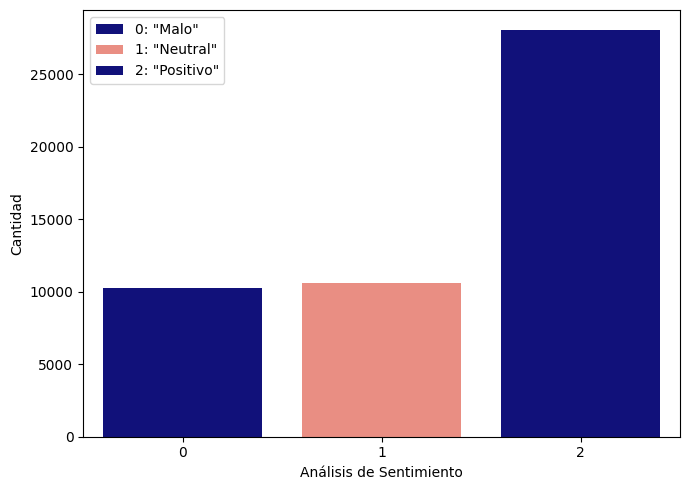

In [13]:
#Ahora se hará el EDA respecto al dataframe reviews
#En este caso se hará un count plot de analisis de sentimiento

# Countplot para 'sentiment_analysis'
import seaborn as sns
plt.figure(figsize=(7, 5))
colors=['#DC4844','#D5DADB','#1EDBA1']
sns.countplot(data=reviews, x='sentiment_analysis', palette=colors)
plt.xlabel('Análisis de Sentimiento')
plt.ylabel('Cantidad')
plt.legend(labels=['0: "Malo"', '1: "Neutral"', '2: "Positivo"'])
plt.tight_layout()
plt.show()

In [14]:
# Cantidad de usuarios que dieron su opinion
print(f"Cantidad de usuarios únicos que opinaron: {len(reviews['user_id'].unique())}")

Cantidad de usuarios únicos que opinaron: 22783


Observando este gráfico y leyendo la cantidad de usuarios que dierón su opinión podemos diferir que ubierón usuarios que dierón más de una opinión. 

Text(0.5, 1.0, 'Distribución de precios de los juegos')

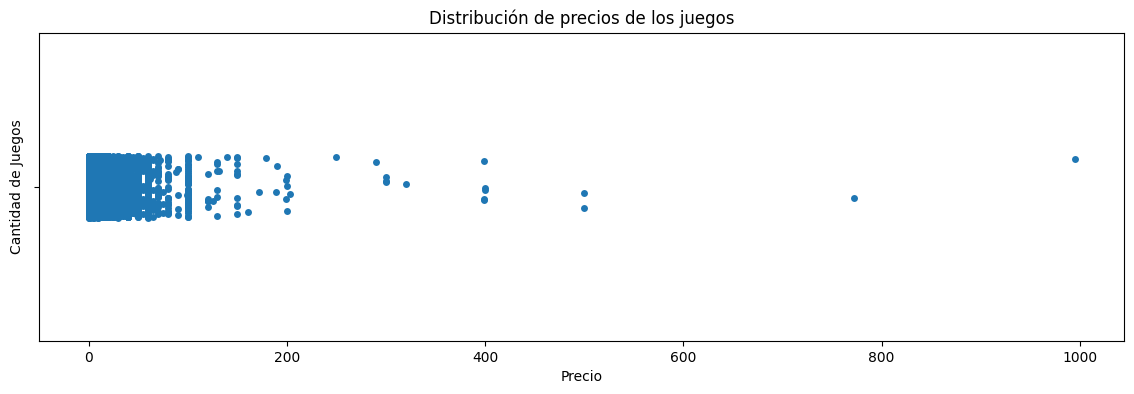

In [15]:
#Distribución de precio
# Obtiene los precios para cada juego y hace un dataframe
precio_unicos = games.groupby('item_id')['price'].unique().reset_index().explode('price')
df_precio_unicos = precio_unicos[['price']]
plt.figure(figsize=(14, 4))
sns.stripplot(data=df_precio_unicos, x='price')
plt.xlabel('Precio') 
plt.ylabel('Cantidad de Juegos') 
plt.title('Distribución de precios de los juegos')

Observando la distribución de precios podemos ver que  que a partir de los 200 los juegos conseguidos por un valor menor son muy pocos y no estarian en un mercado altamente competitivo.

###  Analizando la columna 'reviews_date'

In [16]:
reviews.head()

,user_id,item_id,reviews_helpful,reviews_recommend,reviews_date,sentiment_analysis
0,76561197970982479,1250,No ratings yet,True,2011-11-05,2
1,js41637,251610,15 of 20 people (75%) found this review helpful,True,2014-06-24,2
2,doctr,250320,2 of 2 people (100%) found this review helpful,True,2013-10-14,2
3,maplemage,211420,35 of 43 people (81%) found this review helpful,True,2014-04-15,1
4,Wackky,249130,7 of 8 people (88%) found this review helpful,True,2014-05-05,0


Se revisan la cantidad de fechas con formato inválido o que no tenían fecha en el conjunto de datos original.



In [17]:
print(f'La cantidad de fechas en formato inválido son: {len(reviews[reviews["reviews_date"]=="Formato inválido"])}')


La cantidad de fechas en formato inválido son: 0


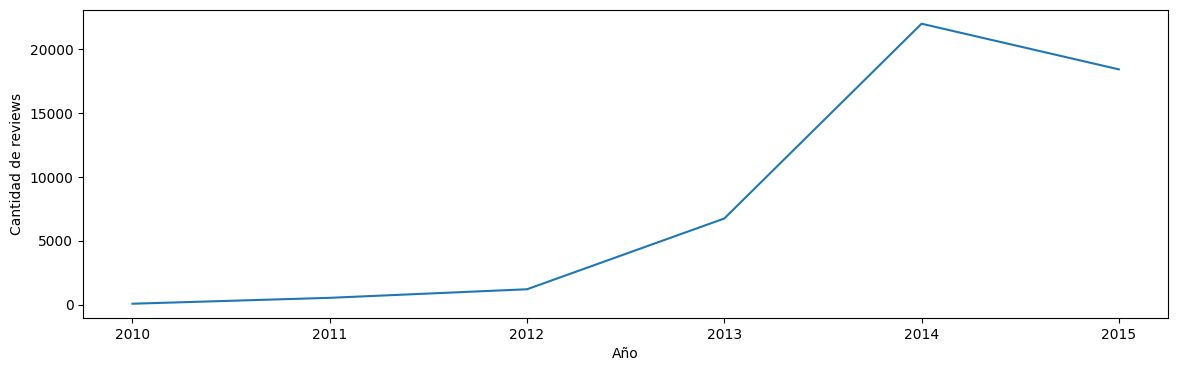

In [19]:
# Calcula la cantidad de review por fecha

#Convertir la columna de fecha a tipo de datos de fecha
reviews['reviews_date'] = pd.to_datetime(reviews['reviews_date'])

# Extraer el año de la fecha
reviews['year'] = reviews['reviews_date'].dt.year

# Calcular la cantidad de reviews por año

#agrupamos por año
df_counts = reviews.groupby("year").count()

 #Graficar
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_counts, x=df_counts.index, y="reviews_recommend")
plt.xlabel('Año')
plt.ylabel('Cantidad de reviews')
plt.show()

In [20]:
print('Años de cantidad pico de reviews')
df_counts.sort_values(by='reviews_recommend', ascending=False)['reviews_recommend'][:5]

Años de cantidad pico de reviews


year
2014    21984
2015    18411
2013     6734
2012     1194
2011      524
Name: reviews_recommend, dtype: int64

La mayor cantidad de reviews se dio en el año 2014 seguido por 2015 se puede observar que hubo un gran auge después del 2013.

Se asignara una metrica llamada combined_metric que tomara la columna 'reviews_recommend' y 'sentiment_analysis', para en base a esta metrica aplicar SIMILITUD del COSENO.

In [24]:
# Se asigna pesos a cada característica
weight_reviews = 0.7
weight_sentiment = 0.3

In [25]:
# Se calcula la métrica combinada
reviews['combined_metric'] = (weight_reviews * reviews['reviews_recommend'].astype(int)) + (weight_sentiment * reviews['sentiment_analysis'])

In [26]:
#Se dejan unicamente las columnas necesarias
df_reviews = reviews[['user_id', 'item_id', 'combined_metric']]
df_reviews.head(3)

,user_id,item_id,combined_metric
0,76561197970982479,1250,0.7
1,js41637,251610,0.7
2,doctr,250320,0.7


## EDA del dataset user_items

In [21]:
items

,item_id,playtime_forever,playtime_2weeks,user_id,items_count,steam_id
0,10,6,0,76561197970982479,277,76561197970982479
1,20,0,0,76561197970982479,277,76561197970982479
2,30,7,0,76561197970982479,277,76561197970982479
3,40,0,0,76561197970982479,277,76561197970982479
4,50,0,0,76561197970982479,277,76561197970982479
...,...,...,...,...,...,...
5153204,346330,0,0,76561198329548331,7,76561198329548331
5153205,373330,0,0,76561198329548331,7,76561198329548331
5153206,388490,3,3,76561198329548331,7,76561198329548331
5153207,521570,4,4,76561198329548331,7,76561198329548331


In [22]:
# Se unen la cantidad de usuarios e items para realizar el conteo
items_count_user = items.groupby('user_id')['items_count'].count().reset_index()
items_count_user = items_count_user.sort_values('items_count',ascending=False)

#Crear el gráfico
plt.figure(figsize=(12,2))
sns.boxplot(data=items_count_user, x='items_count', color='skyblue')
plt.xlabel('Cantidad de items por usuario')
plt.title('')



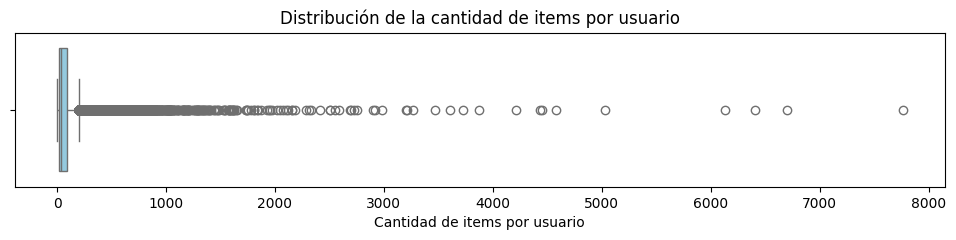

In [23]:
# Crear el gráfico de caja (boxplot)
plt.figure(figsize=(12, 2))
sns.boxplot(data=items_count_user, x='items_count', color='skyblue')
plt.xlabel('Cantidad de items por usuario')
plt.title('Distribución de la cantidad de items por usuario')
plt.show()

Se asignara una metrica llamada combined_metric que tomara la columna 'reviews_recommend' y 'sentiment_analysis', para en base a esta metrica aplicar SIMILITUD del COSENO.

In [27]:
# Se asigna pesos a cada característica
weight_reviews = 0.7
weight_sentiment = 0.3

In [28]:
# Se calcula la métrica combinada
reviews['combined_metric'] = (weight_reviews * reviews['reviews_recommend'].astype(int)) + (weight_sentiment * reviews['sentiment_analysis'])

In [29]:
#Se dejan unicamente las columnas necesarias
df_reviews = reviews[['user_id', 'item_id', 'combined_metric']]
df_reviews.head(3)

,user_id,item_id,combined_metric
0,76561197970982479,1250,1.3
1,js41637,251610,1.3
2,doctr,250320,1.3


In [31]:
# Se toman las columnas necesarias del dataset items y se borran los dumplicados
df_items = items[['item_id']]
df_items = items.drop_duplicates()

In [ ]:
#Se agrega este df de items con los nombres de los juegos al df de reviews
df_for_pivot = df_reviews.merge(df_items, left_on="item_id", right_on="item_id", how='left')